In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import sys

In [6]:
data_cuckoo = pd.read_csv("cuckootesting.txt", sep="\t", usecols=['No.','Time','Fitness','Node'])
data_cuckoo.head()

,No.,Time,Fitness,Node
0,1,0.83,0.72,12
1,2,0.87,0.70,12
2,3,0.79,0.68,13
3,4,7.04,0.71,12
4,5,4.81,0.71,12


In [9]:
data_cheapest = pd.read_csv("cheapesttesting.txt", sep="\t", usecols=['No.','Time','Fitness','Node'])
data_cheapest.head()

,No.,Time,Fitness,Node
0,1,21.50,0.48,13
1,2,19.50,0.51,14
2,3,17.48,0.50,12
3,4,19.56,0.50,14
4,5,20.93,0.54,14


In [59]:
df = pd.DataFrame()
df['cuckootime'] = data_cuckoo['Time']
df['cheapesttime'] = data_cheapest['Time']

In [60]:
df.head()

,cuckootime,cheapesttime
0,0.83,21.50
1,0.87,19.50
2,0.79,17.48
3,7.04,19.56
4,4.81,20.93


<AxesSubplot:>

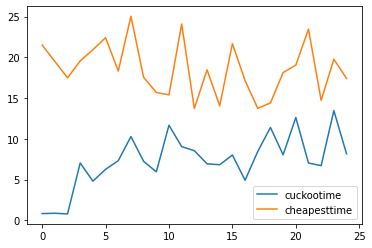

In [61]:
df.plot(kind='line')

In [62]:
iteration = [1,5,10,15,20,25]
cuckoo_time = []
cuckoot = 0
cheapest_time = []
cheapestt = 0
i = 1
for index, x in df.iterrows() :
    cuckoot += x['cuckootime']
    cheapestt += x['cheapesttime']
    if i == 1 or i%5==0 :
        cuckoo_time.append(cuckoot)
        cheapest_time.append(cheapestt)
    i+=1

print(cuckoo_time,"--",cheapest_time)

[0.83, 14.34, 51.39000000000001, 94.41, 135.24, 183.23000000000002] -- [21.5, 98.97, 197.97, 283.69, 368.8, 463.20000000000005]


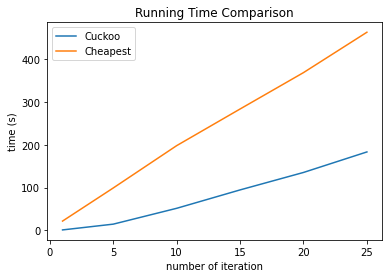

In [71]:
plt.plot(iteration,cuckoo_time, label="Cuckoo")
plt.plot(iteration,cheapest_time, label="Cheapest")
plt.title("Running Time Comparison")
plt.xlabel("number of iteration")
plt.ylabel("time (s)")
plt.legend()

plt.savefig("TimeComparison.png")
plt.show()

In [64]:
df_fit = pd.DataFrame()
df_fit['cuckoofit'] = data_cuckoo['Fitness']
df_fit['cheapestfit'] = data_cheapest['Fitness']

In [65]:
df_fit.head()

,cuckoofit,cheapestfit
0,0.72,0.48
1,0.70,0.51
2,0.68,0.50
3,0.71,0.50
4,0.71,0.54


In [66]:
iteration = [1,5,10,15,20,25]
cuckoo_fit = []
cuckoof = 999
cheapest_fit = []
cheapestf = 999
i = 1
for index, x in df_fit.iterrows() :
    if cuckoof > x['cuckoofit'] :
        cuckoof = x['cuckoofit']
    if cheapestf > x['cheapestfit'] :
        cheapestf = x['cheapestfit']
    if i == 1 or i%5==0 :
        cuckoo_fit.append(cuckoof)
        cheapest_fit.append(cheapestf)
    i+=1

print(cuckoo_fit,"--",cheapest_fit)

[0.72, 0.68, 0.68, 0.68, 0.67, 0.65] -- [0.48, 0.48, 0.48, 0.48, 0.47, 0.47]


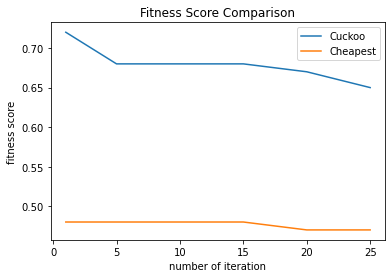

In [72]:
plt.plot(iteration,cuckoo_fit, label="Cuckoo")
plt.plot(iteration,cheapest_fit, label="Cheapest")
plt.title("Fitness Score Comparison")
plt.xlabel("number of iteration")
plt.ylabel("fitness score")
plt.legend()

plt.savefig("FitnessComparison.png")
plt.show()

In [68]:
df_node = pd.DataFrame()
df_node['cuckoonode'] = data_cuckoo['Node']
df_node['cheapestnode'] = data_cheapest['Node']

In [69]:
iteration = [1,5,10,15,20,25]
cuckoo_node = []
cuckoon = 0
cheapest_node = []
cheapestn = 0
i = 1
for index, x in df_node.iterrows() :
    cuckoon += x['cuckoonode']
    cheapestn += x['cheapestnode']
    if i == 1 or i%5==0 :
        cuckoo_node.append(cuckoon/i)
        cheapest_node.append(cheapestn/i)
    i+=1

print(cuckoo_node,"--",cheapest_node)

[12.0, 12.2, 12.3, 12.266666666666667, 12.4, 12.44] -- [13.0, 13.4, 13.5, 13.4, 13.3, 13.24]


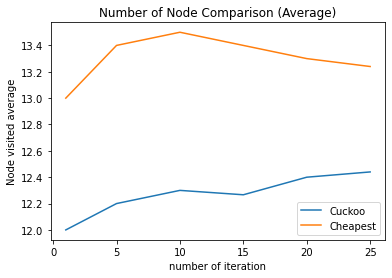

In [73]:
plt.plot(iteration,cuckoo_node, label="Cuckoo")
plt.plot(iteration,cheapest_node, label="Cheapest")
plt.title("Number of Node Comparison (Average)")
plt.xlabel("number of iteration")
plt.ylabel("Node visited average")
plt.legend()

plt.savefig("NodeAvgComparison.png")
plt.show()